In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
listings_df = pd.read_parquet('../data/raw/airbnb_listings_v1.0.parquet')
listings_df.head()

,ID,Name,Host ID,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,City,State,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,4008728,"Luxurious 3 bedroom, centrum, 180m2",20786453,2014-09-01,within a day,50.0,NaN,1.0,1.0,Oud-West,Amsterdam,North Holland,1054 AA,Netherlands,Apartment,Entire home/apt,6.0,1.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,600.0,NaN,6000.0,500.0,50.0,4.0,50.0,2.0,1125.0,14.0,44.0,74.0,74.0,31.0,89.0,9.0,8.0,9.0,10.0,10.0,9.0,strict,1.52,"Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,Luxury apartment in city centre,11964927,2014-02-05,within a few hours,100.0,NaN,1.0,1.0,Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,175.0,NaN,4000.0,400.0,40.0,2.0,30.0,2.0,1125.0,0.0,0.0,0.0,259.0,15.0,99.0,9.0,9.0,9.0,10.0,10.0,9.0,strict,0.81,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,Cosy apartment across Vondelpark,23669273,2014-11-12,None,NaN,NaN,1.0,1.0,Oud-West,Amsterdam,Noord-Holland,1054,Netherlands,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,125.0,600.0,NaN,NaN,NaN,1.0,0.0,4.0,1125.0,0.0,0.0,0.0,0.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.05,"Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,Spacious City Apartment Oud-West,9238680,2013-10-05,within a day,100.0,NaN,1.0,1.0,Oud-West,Amsterdam,Noord-Holland,1052 RT,Netherlands,Apartment,Entire home/apt,4.0,1.0,2.0,4.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,130.0,NaN,NaN,100.0,45.0,2.0,25.0,3.0,30.0,0.0,0.0,0.0,0.0,22.0,97.0,10.0,9.0,10.0,9.0,9.0,9.0,flexible,0.62,"Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,Cosy Studio Apartment Center Amsterdam,89112644,2016-08-10,within a day,100.0,NaN,1.0,1.0,None,Amsterdam,Noord-Holland,1053,Netherlands,Apartment,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Smoke det...",NaN,80.0,NaN,NaN,100.0,25.0,1.0,0.0,2.0,1125.0,2.0,21.0,51.0,326.0,16.0,78.0,8.0,8.0,8.0,8.0,9.0,9.0,moderate,2.04,Host Has Profile Pic


In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID                           494953 non-null  Int64         
 1   Name                         494536 non-null  object        
 2   Host ID                      494954 non-null  int64         
 3   Host Since                   494449 non-null  datetime64[ns]
 4   Host Response Time           379885 non-null  object        
 5   Host Response Rate           379884 non-null  float64       
 6   Host Acceptance Rate         42257 non-null   float64       
 7   Host Listings Count          494449 non-null  float64       
 8   Host Total Listings Count    494448 non-null  float64       
 9   Neighbourhood                345403 non-null  object        
 10  City                         494500 non-null  object        
 11  State                     

In [5]:
listings_df.describe()

,ID,Host ID,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
count,4.949530e+05,4.949540e+05,379884.000000,42257.000000,494449.000000,494448.000000,494891.000000,493428.000000,494328.000000,494037.000000,12209.000000,486996.000000,97747.000000,96091.000000,204012.000000,315715.000000,494952.000000,494917.000000,494952.000000,4.949520e+05,494952.000000,494952.000000,494952.000000,494952.000000,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,372947.000000
mean,9.861856e+06,3.234417e+07,93.376549,88.161251,9.549721,9.549738,3.311584,1.249632,1.378322,1.934525,575.544762,138.072703,493.650127,2961.696277,274.126703,62.267906,1.550235,12.028728,3.470415,2.123406e+05,9.961726,22.997256,37.878594,166.092332,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,1.479523
std,5.401659e+06,3.172156e+07,17.592441,21.618625,57.199523,57.199579,2.094052,0.607029,0.942508,1.488128,1825.903405,149.670499,215.538103,4688.495984,171.605763,75.746943,1.224923,31.189786,89.396359,2.024385e+07,10.981093,22.351102,33.856420,140.510625,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,1.731931
min,6.000000e+00,1.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,5.360628e+06,6.886060e+06,98.000000,86.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000,320.000000,1178.500000,150.000000,20.000000,1.000000,0.000000,1.000000,3.200000e+01,0.000000,0.000000,0.000000,14.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.320000
50%,1.005797e+07,2.188181e+07,100.000000,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,377.000000,90.000000,475.000000,1840.000000,200.000000,40.000000,1.000000,0.000000,2.000000,1.125000e+03,5.000000,17.000000,33.000000,148.000000,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.880000
75%,1.460167e+07,4.792177e+07,100.000000,100.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,800.000000,150.000000,650.000000,3000.000000,350.000000,75.000000,2.000000,15.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,313.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.030000
max,1.929175e+07,1.350885e+08,100.000000,100.000000,1114.000000,1114.000000,21.000000,10.000000,96.000000,19.000000,129167.000000,999.000000,999.000000,280016.000000,999.000000,999.000000,20.000000,999.000000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,223.000000


In [6]:
listings_df.groupby('Country')['ID'].nunique()

Country
0                      0
Australia          40693
Austria             7893
Belgium             7419
Canada             30787
China                 51
Cuba                   1
Denmark            20545
France             56562
Germany            20576
Greece              5127
Hong Kong           6423
Ireland             6729
Italy              33146
Mexico                 2
Netherlands        15181
Spain              45844
Switzerland         2381
United Kingdom     61039
United States     134545
Uruguay                1
Vanuatu                1
Vatican City           2
Name: ID, dtype: int64

### Initial Data Cleaning

In [7]:
listings_df['State'] = listings_df['State'].apply(lambda x: x.upper() if type(x) == str else x)

### Filter Data to Only Include Top 4 English Speaking Countries

In [8]:
tc = ['United States', 'United Kingdom', 'Australia', 'Canada']
listings_tc = listings_df.loc[listings_df['Country'].isin(tc)]
print(listings_tc.shape)
listings_tc.head()

(267066, 47)


,ID,Name,Host ID,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,City,State,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
533,15802051,Large double available now.,46296095,2015-10-11,within a few hours,100.0,NaN,2.0,2.0,None,London,ENGLAND,SE11 4PP,United Kingdom,House,Private room,2.0,1.0,2.0,2.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking all...",NaN,44.0,NaN,NaN,100.0,NaN,1.0,15.0,3.0,1125.0,29.0,59.0,89.0,364.0,3.0,93.0,9.0,9.0,10.0,9.0,10.0,10.0,strict,0.83,Host Has Profile Pic
534,14751869,Spacious 4BR home near Brixton and Clapham,11850512,2014-02-01,within an hour,100.0,NaN,1.0,1.0,Brixton,London,ENGLAND,SW2 5HN,United Kingdom,House,Entire home/apt,8.0,1.5,4.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Buzzer/w...",NaN,139.0,NaN,NaN,400.0,65.0,1.0,0.0,3.0,1125.0,0.0,0.0,0.0,0.0,21.0,95.0,10.0,10.0,9.0,10.0,9.0,10.0,moderate,3.73,"Host Is Superhost,Host Has Profile Pic,Host Id..."
535,8901485,quirky room with a view,12594665,2014-02-26,None,NaN,NaN,1.0,1.0,None,London,None,SE1 7AX,United Kingdom,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Buzzer/w...",NaN,70.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1125.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"Host Has Profile Pic,Host Identity Verified"
536,5832248,Lovely 2r flat in the ❤ of Brixton,30273453,2015-03-30,None,NaN,NaN,1.0,1.0,None,London,GREATER LONDON,SW2 1DH,United Kingdom,Apartment,Entire home/apt,6.0,1.0,2.0,4.0,Real Bed,"Internet,Wireless Internet,Kitchen,Heating,Fam...",NaN,70.0,NaN,NaN,NaN,25.0,1.0,12.0,3.0,1125.0,0.0,0.0,0.0,0.0,2.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,0.11,Host Has Profile Pic
537,8049784,Lovely bedroom in a cosy house,33670376,2015-05-18,within a day,100.0,NaN,1.0,1.0,None,London,LONDON,SW16 6AZ,United Kingdom,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Free par...",NaN,25.0,NaN,NaN,100.0,NaN,1.0,15.0,1.0,1125.0,29.0,59.0,89.0,359.0,3.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,moderate,0.18,Host Has Profile Pic


### Percentage of Missing Values in Each Column

In [62]:
listings_tc.isnull().sum().sort_values(ascending = False)

Square Feet                    262852
Host Acceptance Rate           233593
Weekly Price                   216833
Monthly Price                  214592
Security Deposit               152755
Cleaning Fee                    89260
Review Scores Value             72168
Review Scores Checkin           72145
Review Scores Location          72126
Review Scores Accuracy          71967
Review Scores Communication     71830
Review Scores Cleanliness       71820
Review Scores Rating            71453
Neighbourhood                   71258
Reviews per Month               68167
Host Response Rate              63387
Host Response Time              63387
State                           29608
Zipcode                          3853
Amenities                        2721
Price                            2608
Bathrooms                         938
Beds                              553
Host Total Listings Count         429
Host Since                        429
Host Listings Count               429
Bedrooms    

Text(0.5, 1.0, '% Missing values in Each Column')

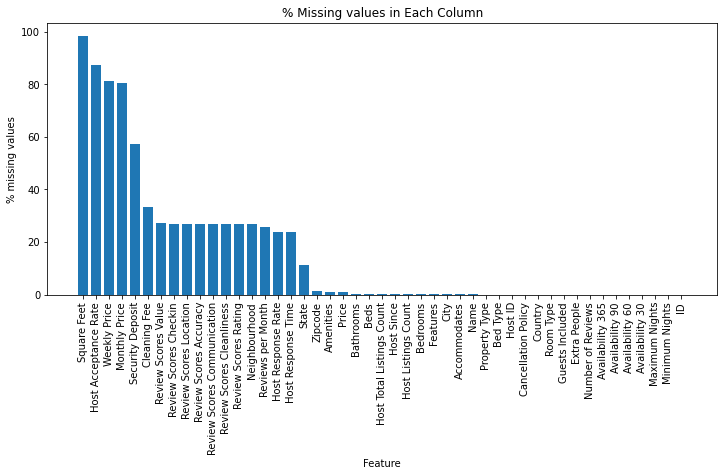

In [9]:
tmp_mv = listings_tc.isnull().sum() * 100 / len(listings_tc)

tmp_mv_df = pd.DataFrame({'col': listings_tc.columns, 'percent': tmp_mv})
tmp_mv_df.sort_values('percent', inplace=True, ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(tmp_mv_df['col'], tmp_mv_df['percent'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('% missing values')
plt.title('% Missing values in Each Column')

### Price Range Across Countries

In [10]:
listings_tc.groupby('Country')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,40219.0,165.077177,142.167599,13.0,75.0,121.0,200.0,999.0
Canada,30692.0,107.010622,89.156506,0.0,54.0,85.0,128.0,999.0
United Kingdom,60966.0,93.020880,79.842147,8.0,42.0,70.0,115.0,999.0
United States,132581.0,156.051199,136.790843,0.0,75.0,113.0,189.0,999.0


[Text(0.5, 0, 'Price (in local currency)'), Text(0, 0.5, 'Country')]

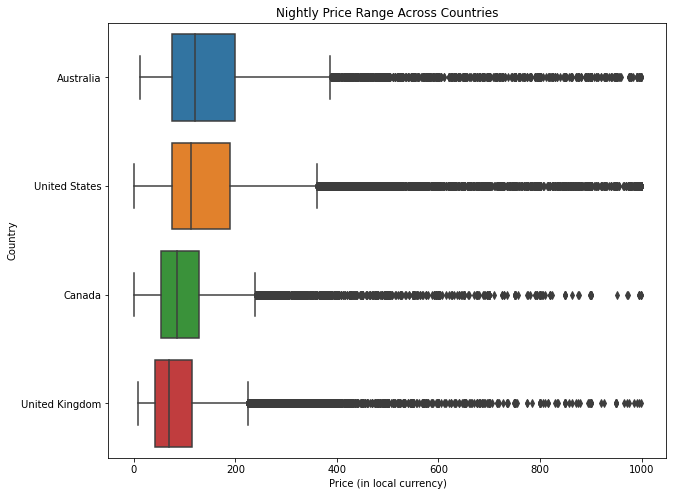

In [51]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=listings_tc, y='Country', x='Price',order=['Australia','United States','Canada','United Kingdom'])
ax.set_title('Nightly Price Range Across Countries')
ax.set(xlabel='Price (in local currency)', ylabel='Country')

### Average Price Across US States

[Text(0.5, 1.0, 'Average Price Across US States'),
 Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Price (in local currency')]

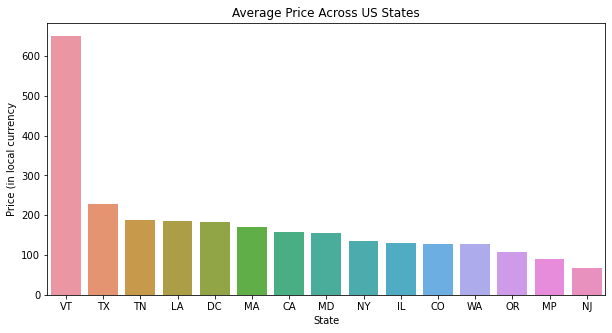

In [53]:
tmp = listings_tc[(listings_tc['Country'] == 'United States')].groupby('State')['Price'].mean()
tmp = tmp.sort_values(ascending=False)
tmp.index

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=tmp.index, y=tmp[:])
ax.set(title='Average Price Across US States', xlabel='State', ylabel='Price (in local currency')

### Number of Listings Across US States

[Text(0.5, 1.0, '# of Listings Across US States'),
 Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Count')]

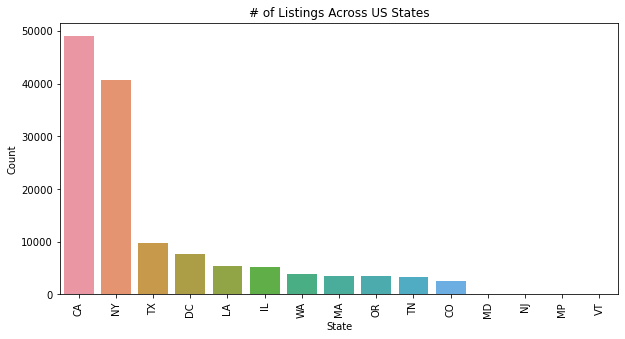

In [55]:
tmp = listings_tc[(listings_tc['Country'] == 'United States')]
tmp_order = tmp['State'].value_counts()
tmp_order = tmp_order.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=tmp_order.index, y=tmp_order[:])
ax.tick_params(axis='x', rotation=90)
ax.set(title='# of Listings Across US States', xlabel='State', ylabel='Count')

### Distribution of Property Type

[Text(0.5, 1.0, 'Distribution of Property Type (Percentage)'),
 Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Percent')]

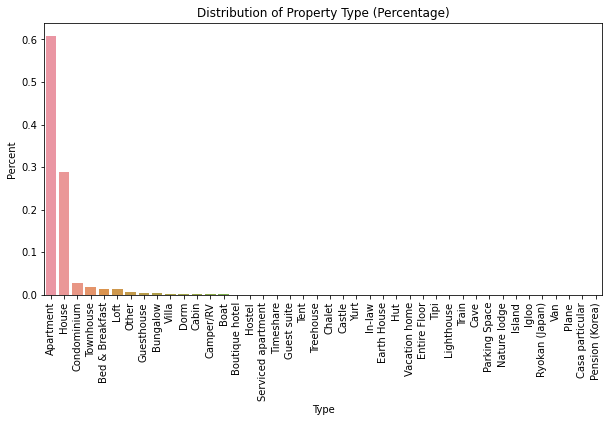

In [27]:
tmp = listings_tc['Property Type'].value_counts(normalize=True)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=tmp.index, y=tmp)
ax.tick_params(axis='x', rotation=90)
ax.set(title='Distribution of Property Type (Percentage)', xlabel='Type', ylabel='Percent')

### Distribution of Room Type

Text(0.5, 1.0, 'Distribution of Room Type\n')

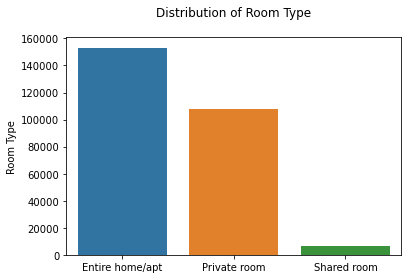

In [57]:
tmp = listings_tc['Room Type'].value_counts()
tmp_labels = tmp.index.tolist()
tmp_colors = sns.color_palette('pastel')[0:5]
ax = sns.barplot(x=tmp.index,y=tmp[:])
ax.set_title('Distribution of Room Type\n')

### Price Distribution across Room Type

[Text(0.5, 0, 'Room Type'), Text(0, 0.5, 'Price (in local currency)')]

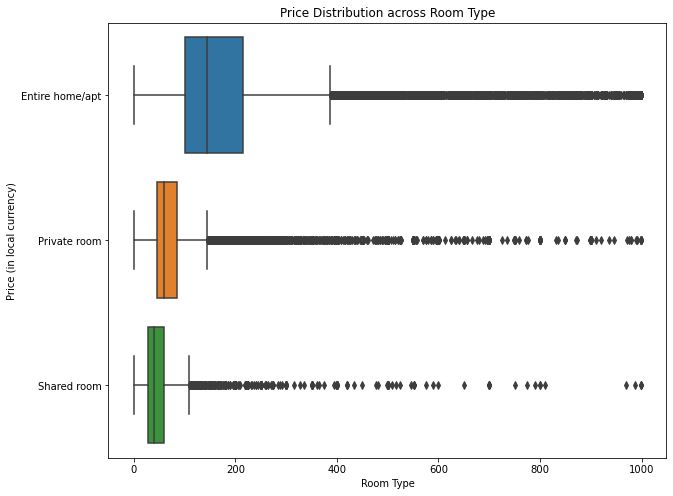

In [56]:
tmp = listings_tc.groupby('Room Type')['Price'].median().index

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y=listings_tc['Room Type'], x=listings_tc['Price'], order=tmp)
ax.set_title('Price Distribution across Room Type')
ax.set(xlabel='Room Type', ylabel='Price (in local currency)')

### Distribution of Host Response Time

Text(0.5, 1.0, 'Distribution of Host Response Time\n')

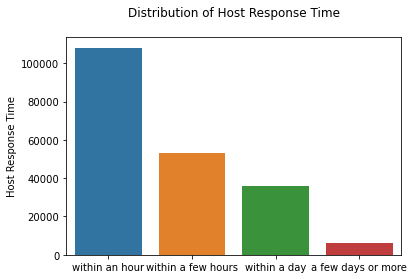

In [48]:
tmp = listings_tc['Host Response Time'].value_counts()
tmp_labels = tmp.index.tolist()
tmp_colors = sns.color_palette('pastel')[0:5]
ax = sns.barplot(x=tmp.index,y=tmp[:])
ax.set_title('Distribution of Host Response Time\n')

### Price Distribution across Host Response Time

[Text(0.5, 0, 'Host Response Time'), Text(0, 0.5, 'Price (in local currency)')]

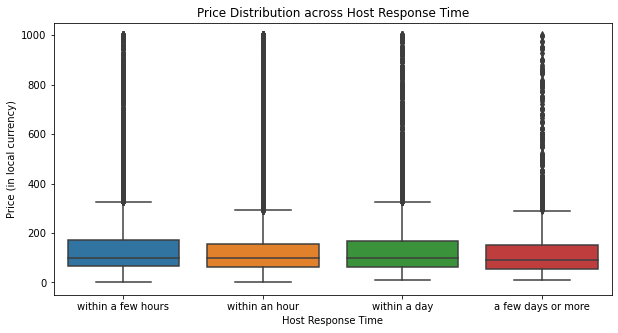

In [49]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=listings_tc['Host Response Time'], y=listings_tc['Price'])
ax.set_title('Price Distribution across Host Response Time')
ax.set(xlabel='Host Response Time', ylabel='Price (in local currency)')

### Correlation Between Different Review Scores

Text(0.5, 1.0, 'Correlation between different Review Scores\n')

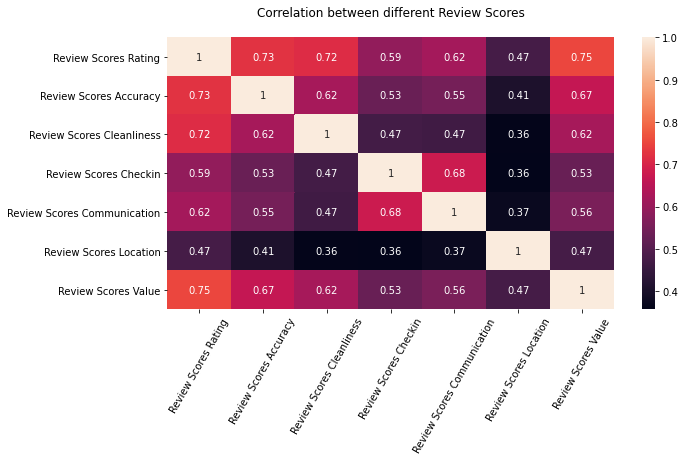

In [50]:
tmp_scores = [
    'Review Scores Rating',
    'Review Scores Accuracy',
    'Review Scores Cleanliness',
    'Review Scores Checkin',
    'Review Scores Communication',
    'Review Scores Location',
    'Review Scores Value',
    ]

tmp = listings_tc[tmp_scores]
plt.figure(figsize=(10, 5))
ax = sns.heatmap(tmp.corr(), annot=True)
ax.tick_params(axis='x', rotation=60)
ax.set_title('Correlation between different Review Scores\n')

We can see that there are some correlation with each other; we may need to consider using PCA to reduce the correlation.